In [2]:
#Importing all necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

In [3]:
#Reading the data
data = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")

#Reading the top 5 rows of the Dataset
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
# Finding out 1024th value of btc market price
data['btc_market_price'][1023]

13.6888

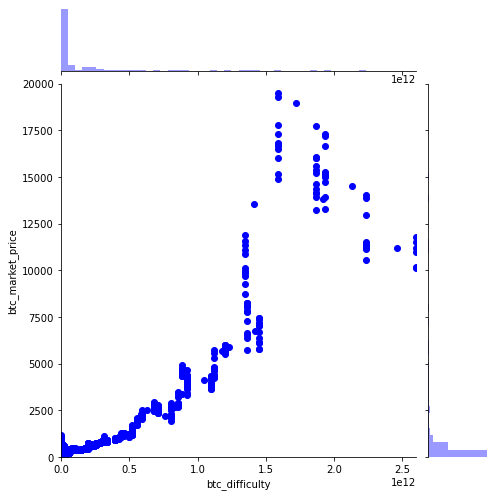

In [5]:
g= sns.jointplot("btc_difficulty", "btc_market_price", data=data, xlim=(0, 2.6E+12), ylim = (0,20000), color = 'b', height=7)

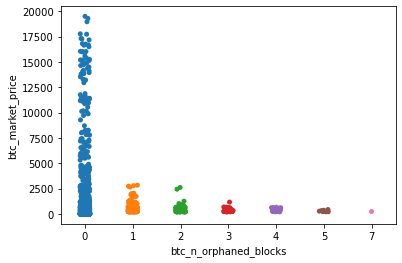

In [6]:
h= sns.stripplot(x= "btc_n_orphaned_blocks", y= "btc_market_price", data=data, jitter= True)

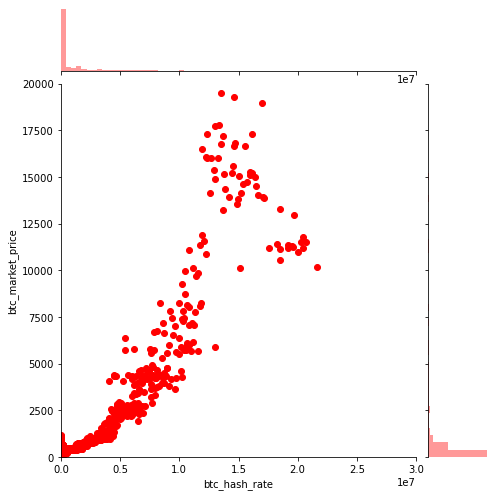

In [7]:
i = sns.jointplot("btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim = (0,20000), color = 'r', height=7)

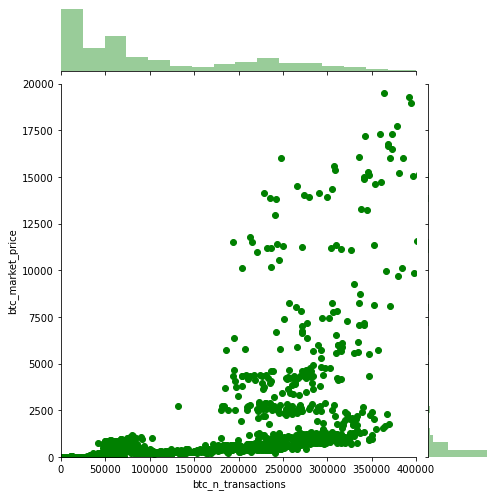

In [8]:
j= sns.jointplot("btc_n_transactions", "btc_market_price", data=data, xlim=(0, 400000), ylim = (0,20000), color = 'g', height=7)

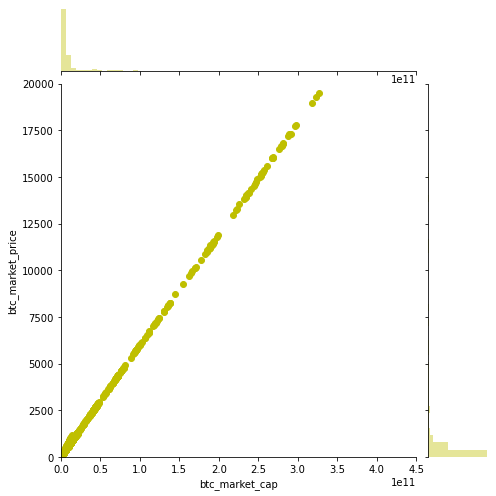

In [9]:
k= sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim = (0,20000), color = 'y', height=7)

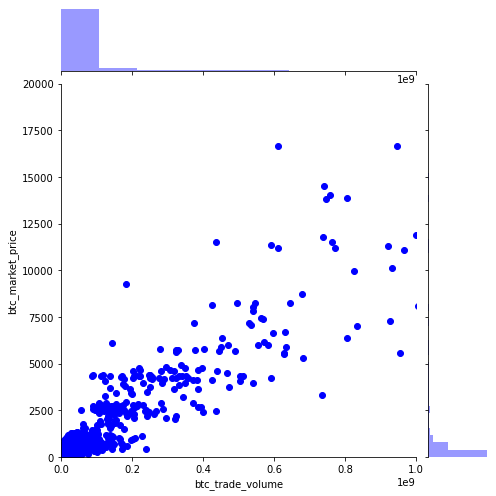

In [10]:
j= sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim = (0,20000), color = 'b', height=7)

In [11]:
#Checking if there are null values present in the columns
a = data['btc_trade_volume'].isnull().values.any()
b = data['btc_transaction_fees'].isnull().values.any()
c = data['btc_difficulty'].isnull().values.any()
print(a)
print(b)
print(c)

True
True
True


In [12]:
#Converting the null values into median of the particular column
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(), inplace= True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(), inplace= True)
data['btc_difficulty'].fillna(data['btc_difficulty'].median(), inplace= True)

In [13]:
#Checking if there are still any null values present in the columns
a = data['btc_trade_volume'].isnull().values.any()
b = data['btc_transaction_fees'].isnull().values.any()
c = data['btc_difficulty'].isnull().values.any()
print(a)
print(b)
print(c)

False
False
False


In [14]:
#Fitting the model
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [15]:
#Finding out the Mean Squared Error of the model data
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.8844851052187


In [17]:
#Predicting the Price of Bitcoin from 1 to 14 February

test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.81147336767
The price on 2 february is 8899.56276317092
The price on 3 february is 9120.369775980458
The price on 4 february is 8466.210217122461
The price on 5 february is 6800.5378583104775
The price on 6 february is 7624.504404967229
The price on 7 february is 8074.796131964017
The price on 8 february is 8262.628128910563
The price on 9 february is 8560.407764791249
The price on 10 february is 8336.05084059777
The price on 11 february is 8427.011758811395
The price on 12 february is 8836.955375610703
The price on 13 february is 8624.39659714465
The price on 14 february is 9362.850887657309
